In [1]:
import pandas as pd
import csv
import numpy as np
import time
import sys
from tqdm import tqdm

In [14]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.decomposition import PCA
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

/Users/guillemramirezsantos/anaconda3/lib/python3.7/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


#### Glove 

We can use 300, 200 or 50 d. They all have 400000 vectors. 

Check: https://web.stanford.edu/class/cs224n/materials/Gensim%20word%20vector%20visualization.html

In [8]:
src_path='glove.6B.300d.txt'#, 'glove.6B.50d.txt', 'glove.6B.200d.txt'
nembed=300
nrows_init=10000 #nrows=nrows_init
tt=time.time()
csv.field_size_limit(sys.maxsize)
df_src = pd.read_csv(src_path, sep=' ', nrows=nrows_init, engine='python', header=None, quoting=csv.QUOTE_NONE, encoding = 'utf-8')
print(time.time()-tt)

3.674302816390991


In [114]:
tt=time.time()
glove_file = datapath('/Users/guillemramirezsantos/Documents/thesis/embeddings/glove.6B.300d.txt')
word2vec_glove_file = get_tmpfile("glove.6B.300d.txt")
glove2word2vec(glove_file, word2vec_glove_file)
model = KeyedVectors.load_word2vec_format(word2vec_glove_file)

/Users/guillemramirezsantos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  after removing the cwd from sys.path.


In [287]:
import numpy as np
numalt=np.load('../numalt.npy', allow_pickle=True)
nume=np.load('../nume.npy', allow_pickle=True)
num_no=np.load('../num_no_cont.npy', allow_pickle=True)
ki=np.load('../ki.npy', allow_pickle=True)
el=np.load('../el.npy', allow_pickle=True)
lis=np.load('../lis.npy', allow_pickle=True)
A=np.load('../A_matrix.npy')

In [358]:
X=np.zeros((1, 300))
T=[]
paraules=[]
noves_frases=np.zeros((1, 300*11))
for idx, l in tqdm(enumerate(el[:1600])):
    if idx==0 or el[idx-1]!=l:
        num_loc=-1
        X_loc=np.zeros((300))
        alguna_falla=False
        global_tag=-1
        numero_val=''
        for idx_2, word in enumerate(l):
            tag=2
            numero=False
            if word=='numnumnum':
                num_loc=idx_2
                word=nume[idx]
                numero=True
                if ki[idx]=='I':
                    tag=0
                    global_tag=3
                else: 
                    tag=1
                    global_tag=4
            if word[-2:]==".0": word=word[:-2]
            word=word.replace(' ', ',')
            try:
                X=np.concatenate((X, model[word].reshape(1, 300)), axis=0)
                X_loc=np.concatenate((X_loc, model[word]), axis=0)
                paraules.append(word)
                T.append(tag)
                if numero:
                    numero_val=word
                    embed_num=model[word]
            except:
                if numero:
                    word=numalt[idx]
                    if word[-2:]==".0": word=word[:-2]
                    word=word.replace(' ', ',')
                try:
                    X=np.concatenate((X, model[word].reshape(1, 300)), axis=0)
                    X_loc=np.concatenate((X_loc, model[word]), axis=0)
                    paraules.append(word)
                    T.append(tag)
                    if numero:
                        numero_val=word
                        embed_num=model[word]
                except:
                    print(word)
                    num_loc=-1
                    alguna_falla=True
        X_loc=X_loc[300:]
        if num_loc!=-1 and not alguna_falla:
            X_aux=np.zeros((1, 300*11))
            for idx_2 in range(len(l)):
                X_aux[0, (5-num_loc+idx_2)*300: (5-num_loc+idx_2+1)*300]=X_loc[idx_2*300:(idx_2+1)*300]
            new_embed=np.matmul(X_aux, A)
            T.append(global_tag)
            X=np.concatenate((X, new_embed), axis=0)
            paraules.append(numero_val)
X=X[1:]

for idx, l in tqdm(enumerate(lis[:800])):
    if idx==0 or lis[idx-1]!=l:
        num_loc=-1
        X_loc=np.zeros((300))
        alguna_falla=False
        global_tag=-1
        numero_val=''
        for idx_2, word in enumerate(l):
            tag=2
            numero=False
            if word=='numnumnum':
                num_loc=idx_2
                word=num_no[idx]
                numero=True
                tag=5
                global_tag=6
            if word[-2:]==".0": word=word[:-2]
            word=word.replace(' ', ',')
            try:
                X=np.concatenate((X, model[word].reshape(1, 300)), axis=0)
                X_loc=np.concatenate((X_loc, model[word]), axis=0)
                paraules.append(word)
                T.append(tag)
                if numero:
                    numero_val=word
                    embed_num=model[word]
            except:
                print(word)
                num_loc=-1
                alguna_falla=True
        X_loc=X_loc[300:]
        if num_loc!=-1 and not alguna_falla:
            X_aux=np.zeros((1, 300*11))
            for idx_2 in range(len(l)):
                X_aux[0, (5-num_loc+idx_2)*300: (5-num_loc+idx_2+1)*300]=X_loc[idx_2*300:(idx_2+1)*300]
            new_embed=np.matmul(X_aux, A)
            T.append(global_tag)
            X=np.concatenate((X, new_embed), axis=0)
            paraules.append(numero_val)

np.save('X_A', X)
np.save('T_A', T)
np.save('paraules_A', paraules)

46it [00:01, 25.67it/s]

worldnews


110it [00:03, 34.59it/s]

cuilapa


144it [00:04, 31.91it/s]

threa


362it [00:26,  5.01it/s]

3000000


552it [00:59,  6.68it/s]

djamena


566it [01:01,  5.68it/s]

44am


568it [01:02,  6.56it/s]

00pm


576it [01:03,  7.58it/s]

sigor


624it [01:08, 10.44it/s]

uous


707it [01:19,  5.78it/s]

reportdely


1047it [02:45,  4.90it/s]

jonquel


1089it [03:02,  1.70it/s]

poreans


1132it [03:15,  4.45it/s]

afgahnistan


1175it [03:29,  3.22it/s]

55am


1276it [04:02,  2.56it/s]

02pm


1346it [04:30,  2.34it/s]

gilberta


1405it [04:53,  2.89it/s]

sirilal


1600it [06:03,  4.40it/s]
9it [00:04,  2.33it/s]

husner


24it [00:12,  1.82it/s]

200000


33it [00:16,  2.33it/s]

3135


40it [00:19,  2.58it/s]

49am


66it [00:29,  2.26it/s]

pallab


90it [00:41,  1.83it/s]

alsunga


93it [00:42,  2.42it/s]

18pm


100it [00:45,  2.12it/s]

cheecha
watni


115it [00:52,  2.13it/s]

cuilapa


134it [01:00,  2.50it/s]

42pm


135it [01:00,  2.87it/s]

42pm


148it [01:06,  2.26it/s]

bag102


149it [01:06,  2.10it/s]

bag102
bag111


164it [01:13,  2.49it/s]

khenifra


186it [01:25,  2.15it/s]

21500


277it [02:12,  2.26it/s]

22pm


326it [02:46,  1.69it/s]

3007
3007


360it [03:03,  1.79it/s]

700000


364it [03:06,  1.77it/s]

entous


386it [03:24,  1.42it/s]

sayedan


389it [03:26,  1.70it/s]

daray


449it [03:59,  2.08it/s]

jak110


450it [04:00,  2.09it/s]

jak110


487it [04:19,  1.94it/s]

sirilal


490it [04:21,  1.82it/s]

stinebaker


491it [04:21,  1.85it/s]

stinebaker


492it [04:22,  1.88it/s]

kwera


508it [04:30,  1.71it/s]

khairalla


515it [04:33,  2.29it/s]

42am


529it [04:41,  1.74it/s]

herming


537it [04:45,  1.74it/s]

nalangu


538it [04:46,  1.79it/s]

nalangu


539it [04:47,  1.84it/s]

nalangu


551it [04:53,  1.93it/s]

maelendeleo


563it [04:59,  2.07it/s]

34pm


565it [05:00,  2.29it/s]

44am


573it [05:05,  1.73it/s]

nalangu


616it [05:30,  1.76it/s]

200000


630it [05:38,  1.65it/s]

talkbacks


633it [05:39,  1.65it/s]

erhahon


638it [05:42,  1.64it/s]

nbsp


639it [05:43,  1.85it/s]

nbsp


648it [05:48,  1.95it/s]

jodale
woodfork


676it [06:05,  1.79it/s]

200000


678it [06:06,  1.64it/s]

diadie


720it [06:32,  1.74it/s]

38am


744it [06:49,  1.80it/s]

30am


766it [07:04,  1.52it/s]

zengerle


794it [07:23,  1.46it/s]

dasoz


795it [07:24,  1.51it/s]

dasoz


797it [07:25,  1.70it/s]

dasoz


800it [07:27,  1.79it/s]


In [2]:
T=np.load('T_A.npy')
X=np.load('X_A.npy')
paraules=np.load('paraules_A.npy')

In [3]:
XX=X[np.where((np.array(T) == 3)  | (np.array(T) == 4)  | (np.array(T) == 6))[0]]
XX.shape

(2045, 300)

<IPython.core.display.Javascript object>


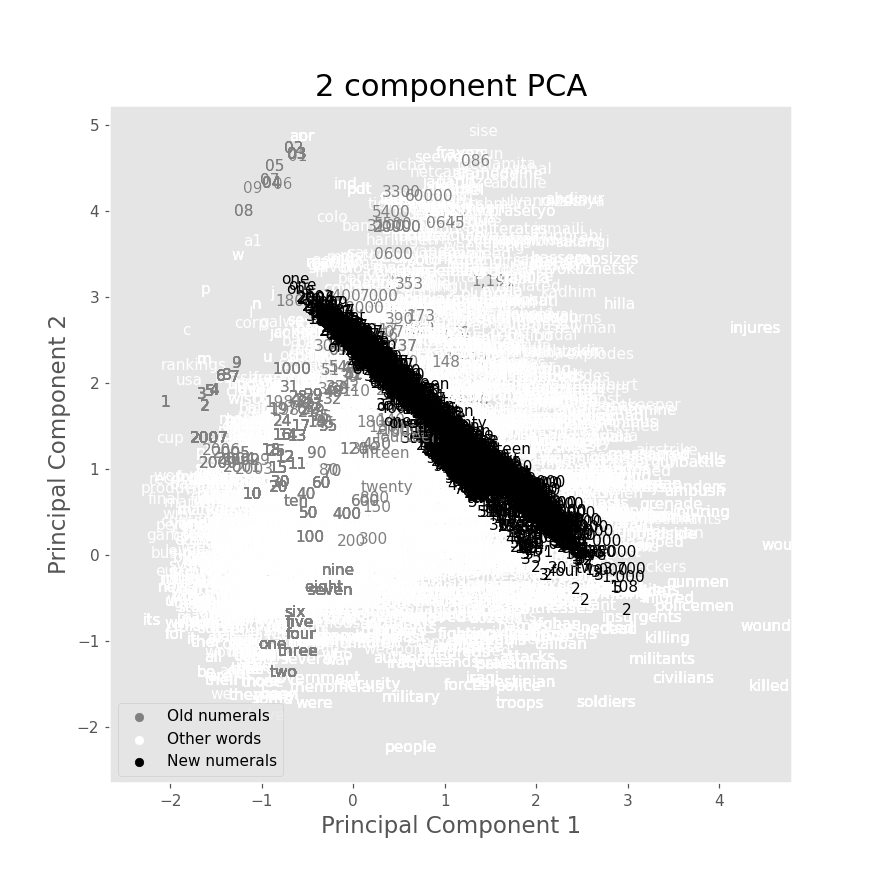

287
1038
18173
283
1026
781
736


In [19]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=2)
#[np.where((np.array(T) == 3) | (np.array(T) == 4)| (np.array(T) == 6))[0]]
principalComponents = pca.fit_transform(X)
Df = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
Df["labels"]=np.array(T)#[np.where((np.array(T) == 3) | (np.array(T) == 4)| (np.array(T) == 6))[0]]
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
#ax.scatter((kmeans.cluster_centers_)[:, 0], (kmeans.cluster_centers_)[:, 1], 10)
colors = ['grey', 'grey', 'white', 'black', 'black', 'grey', "black", "pink"]
#colors = ['grey', 'grey', 'white', 'purple', 'green', 'grey', "orange", "pink"]
perm={0: 2, 1: 4, 2: 5, 3:1, 4:0, 5:3, 6:6}
for idx, color in enumerate(colors):
    #idx=perm[idx]
    if idx in [0, 1, 2, 3, 4, 5, 6]: #, 3, 4, 5, 6, 7]:
        aux_Df=Df[Df["labels"]==idx]
        if idx==3: ll="New numerals"
        if idx==0: ll="Old numerals"
        if idx==2: ll="Other words"
        print(len(aux_Df))
        if idx==3 or idx==0 or idx==2: 
            ax.scatter(aux_Df['principal component 1'], aux_Df['principal component 2'], s = 0, c=color, label=ll)
        else:
            ax.scatter(aux_Df['principal component 1'], aux_Df['principal component 2'], s = 0, c=color)
        if len(aux_Df)>0:
            n=np.array(paraules)[np.where((np.array(T) == idx))[0]]
            for i, txt in enumerate(n):
                ax.annotate(txt, (aux_Df['principal component 1'].iloc[i], aux_Df['principal component 2'].iloc[i]), color=color)

ax.legend()    
lgnd = plt.legend(loc="lower left", scatterpoints=1, fontsize=10)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]
#ax.legend(targets)
#ax.scatter(pca.transform(kmeans.cluster_centers_)[:, 0], pca.transform(kmeans.cluster_centers_)[:, 1], 100)
ax.grid()
plt.savefig('../figures/PCA_A_tots_bonanova')

In [277]:
W=np.matmul(XX, model['dead'])/(np.linalg.norm(XX[ii])*np.linalg.norm(model['dead']))
WW=np.matmul(XX, model['injured'])/(np.linalg.norm(XX[ii])*np.linalg.norm(model['injured']))

<IPython.core.display.Javascript object>


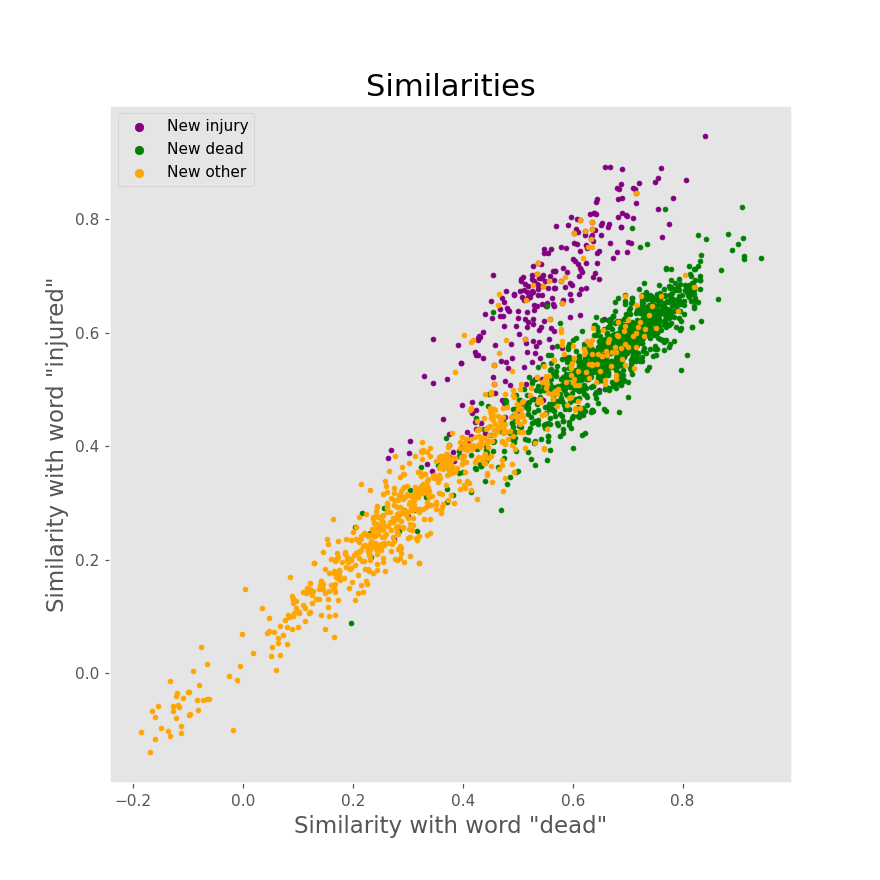

In [284]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Similarity with word "dead"', fontsize = 15)
ax.set_ylabel('Similarity with word "injured"', fontsize = 15)
ax.set_title('Similarities', fontsize = 20)

for idx, color in enumerate(colors):
    #idx=perm[idx]
    if idx in [0, 1, 2, 3, 4, 5, 6]: #, 3, 4, 5, 6, 7]:
        if idx==3: ll="New injury"
        if idx==4: ll="New dead"
        if idx==6: ll="New other"
        if idx==3 or idx==4 or idx==6: 
            ax.scatter(W[np.where((np.array(TP) == idx))[0]], WW[np.where((np.array(TP) == idx))[0]], s = 10, c=color, label=ll)
            n=np.array(TParaules)[np.where((np.array(TP) == idx))[0]]
            #for i, txt in enumerate(n):
            #    ax.annotate(txt, (W[np.where((np.array(TP) == idx))[0]][i], WW[np.where((np.array(TP) == idx))[0]][i]), color=color)
ax.legend()    
lgnd = plt.legend(loc="upper left", scatterpoints=1, fontsize=10)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]
ax.grid()
plt.savefig('../figures/similarities_new')

In [261]:
n

array(['1', 'dead', 'hurt', 'in', 'plant', 'u.s.', 'strike', 'kills',
       'family', 'members', 'near', 'kabul', 'afghans', 'one', 'person',
       'and', 'critically', 'wounded', 'others', 'monday', 'in', 'the',
       'signal', '1', 'dead', 'wounded', 'in', 'l', 'a', 'area',
       'mclaughlin', 'photo', 'mod', 'pa', 'wire', 'british', 'soldiers',
       'killed', 'during', 'a', 'vienna', 'austria', 'reuters', 'people',
       'were', 'killed', 'on', 'monday', 'reuters', 'suspected',
       'islamist', 'militants', 'killed', 'policemen', 'in', 'algeria',
       'in', 'an', 'algiers', 'suspected', 'islamist', 'militants',
       'killed', 'police', 'officers', 'in', 'algeria', 'in', 'algerian',
       'rebels', 'kill', 'policemen', 'ambush', 'baghdad', 'car', 'bomb',
       'kills', 'violence', 'monday', 'killing', 'at', 'least', 'people',
       'in', 'a', 'blast', 'that', 'car', 'bomber', 'kills', 'in', 'on',
       'saturday', 'killed', 'at', 'least', 'people', 'more', 'than',
  

In [204]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=20).fit(X)

In [303]:
np.matmul(model['death'], XX[0])/np

12.051816930187117

In [307]:
model.similarity('death', 'life')

0.52323204

In [204]:
from numpy import linalg

contador=0
contador_bo=0
assert len(TP)==XX.shape[0]
for ii, element in enumerate(XX):
    aux=np.matmul(XX[ii], model['died'])/(np.linalg.norm(XX[ii])*np.linalg.norm(model['died'])) - np.matmul(XX[ii], model['injured'])/(np.linalg.norm(XX[ii])*np.linalg.norm(model['injured']))
    if TP[ii]==3:
        contador+=1
        if aux < 0: contador_bo+=1

    if TP[ii]==4:
        contador+=1
        if aux > 0: contador_bo+=1
            
print(contador_bo/contador)
        

0.8732943469785575


In [138]:
contador

1309

In [20]:
YY=X[np.where((np.array(T) == 2))[0]]
TT=np.array(T)[np.where((np.array(T) == 2) | (np.array(T) == 2)| (np.array(T) == 2))[0]]
Tparaules=np.array(paraules)[np.where((np.array(T) == 2) | (np.array(T) == 2)| (np.array(T) == 2))[0]]

In [259]:
len(Tparaules)

18173

In [33]:
TP=np.array(T)[np.where((np.array(T) == 3) | (np.array(T) == 4)| (np.array(T) == 6))[0]]
TParaules=np.array(paraules)[np.where((np.array(T) == 3) | (np.array(T) == 4)| (np.array(T) == 6))[0]]
idx=10
print(TP[idx])
print(TParaules[idx])
assert XX.shape[0]==len(TP)

4
10


In [55]:
TP[np.where(TParaules == 'five')]

array([4, 4, 4, 3, 3, 3, 4, 4, 3, 4, 4, 4, 4, 3, 4, 4, 3, 3, 4, 4, 4, 3,
       4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 4, 4, 3,
       3, 4, 3, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6])

In [64]:
np.where(TParaules == 'five')[0][-5]

1936

In [65]:
import scipy
#J=kmeans.cluster_centers_
#YourTreeName = scipy.spatial.cKDTree(YY, leafsize=100)
elem = YourTreeName.query(XX[1936], k=2000)[1]
print(str(Tparaules[elem[0]]))
print(str(Tparaules[elem[100]]))
for i, el in enumerate(elem[:1000]):
    if i>0 and Tparaules[elem[i]]!=old: print(str(Tparaules[elem[i]]))
    old=Tparaules[elem[i]]
#print(convos[elem[10]])
#print(convos[elem[300]])

addition
others
although
afterward
once
both
leaving
apparently
others
putting
none
adding
thought
apart
while
arguing
turning
came
beginning
coming
previously
taken
yet
comes
claiming
result
picked
recently
another
also
and
but
thirty
believed
only
occasion
concerned
indicated
when
seen
whom
already
definitely
wanted
bring
immediately
given
ago
which
shortly
included
so
locals
one
as


In [300]:
import sklearn.metrics

XX=X[np.where((np.array(T) == 3) | (np.array(T) == 4)| (np.array(T) == 6))[0]]
TT=np.array(T)[np.where((np.array(T) == 3) | (np.array(T) == 4)| (np.array(T) == 6))[0]]
sklearn.metrics.silhouette_score(XX, TT)

XX=X[np.where((np.array(T) == 0) | (np.array(T) == 1)| (np.array(T) == 5))[0]]
TT=np.array(T)[np.where((np.array(T) == 0) | (np.array(T) == 1)| (np.array(T) == 5))[0]]
sklearn.metrics.silhouette_score(XX, TT)


-0.02096989869838928

In [237]:
XX=X[np.where((np.array(T) == 3) | (np.array(T) == 4)|(np.array(T) == 6))[0]]

In [92]:
paraules[-11:]

['warships',
 'and',
 'fishermen',
 'have',
 'pulled',
 '21',
 'bodies',
 'from',
 'the',
 'java',
 'sea']

In [95]:
X_aux[0, 300*5:300*6]-model['21']

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

['warships',
 'and',
 'fishermen',
 'have',
 'pulled',
 'numnumnum',
 'bodies',
 'from',
 'the',
 'java',
 'sea']

In [344]:
normes=[]
means=[]
death=[]
year=[]
injured=[]
IMP_DEAD=[]
for elem in range(11):
    aux=np.linalg.norm(A[elem*300:(elem+1)*300])
    dd=np.linalg.norm(np.matmul(kill, A[elem*300:(elem+1)*300]))
    aa=np.matmul(kill, np.matmul(A[elem*300:(elem+1)*300], model['killed']))#/np.linalg.norm(A[elem*300:(elem+1)*300])
    bb=np.matmul(kill, np.matmul(A[elem*300:(elem+1)*300], model['injury']))#/np.linalg.norm(A[elem*300:(elem+1)*300])
    cc=np.matmul(kill, np.matmul(A[elem*300:(elem+1)*300], model['2011']))
    death.append(aa)
    injured.append(bb)
    year.append(cc)
    IMP_DEAD.append(dd)
    normes.append(aux)
    means.append(A[elem*300:(elem+1)*300].mean())

In [369]:
A[elem*300:(elem+1)*300].shape

(300, 300)

In [379]:
np.linalg.norm(model['love'])

6.1360564

In [392]:
#B=np.matmul(kill, A[4*300:(4+1)*300])
np.matmul(B, model['injury'])

3.0835475637534926

In [373]:
scipy.optimize.linprog(B, A_ub=None, b_ub=None, A_eq=None, b_eq=None, bounds=None, method='interior-point', callback=None, options=None, x0=None)

     con: array([], dtype=float64)
     fun: -inf
 message: 'The problem is (trivially) unbounded because there are no non-trivial constraints and a) at least one decision variable is unbounded above and its corresponding cost is negative, or b) at least one decision variable is unbounded below and its corresponding cost is positive. '
     nit: 0
   slack: array([], dtype=float64)
  status: 3
 success: False
       x: array([inf, inf,  0.,  0.,  0.,  0.,  0., inf,  0.,  0., inf, inf, inf,
        0.,  0., inf,  0., inf,  0.,  0.,  0.,  0., inf,  0.,  0., inf,
        0.,  0., inf, inf, inf, inf, inf,  0.,  0.,  0., inf, inf, inf,
       inf, inf,  0., inf,  0.,  0., inf, inf,  0.,  0., inf, inf,  0.,
        0., inf,  0.,  0.,  0., inf,  0., inf,  0.,  0.,  0.,  0.,  0.,
       inf, inf,  0., inf,  0., inf,  0., inf, inf,  0.,  0., inf,  0.,
        0., inf, inf,  0.,  0., inf,  0., inf,  0.,  0., inf, inf, inf,
       inf,  0.,  0., inf, inf, inf, inf, inf, inf,  0.,  0.,  0.,  0.,
 

In [299]:
vec=np.load('vec.npy')
kill=vec[0]
injury=vec[1]

In [363]:
A

array([[ 5.08022716e-04, -8.20821979e-04,  4.75922574e-04, ...,
         8.07014805e-04,  1.96082444e-03, -9.76723923e-04],
       [-1.22296979e-03,  2.98341306e-03, -2.87099342e-03, ...,
        -3.99042695e-03, -5.75985817e-03,  2.12068176e-03],
       [-1.62148037e-05, -1.08912593e-03,  1.89487164e-03, ...,
         2.24121987e-03,  1.08827991e-03,  2.86468123e-04],
       ...,
       [ 2.54673423e-04,  1.31289272e-03, -2.71451415e-03, ...,
        -3.10035461e-03, -7.96353218e-04, -8.84337399e-04],
       [-7.59514729e-04,  3.20626012e-04,  8.40975710e-04, ...,
         6.36080700e-04, -1.99608938e-03,  1.66774495e-03],
       [-1.85643293e-03,  3.75018011e-03, -3.02476192e-03, ...,
        -4.47488381e-03, -7.93993510e-03,  3.39734216e-03]])

In [396]:
normes_elem=[]
for elem in range(300):
    aux=0
    for idx in range(11):
        aux+=np.linalg.norm(A[idx*300+elem])
    normes_elem.append(aux)
    #means.append(A[elem*300:(elem+1)*300].mean())

In [368]:
np.matmul(kill,A[5*300+elem])

-0.6364682669739709

In [351]:
dd

0.2088768706781653

<IPython.core.display.Javascript object>


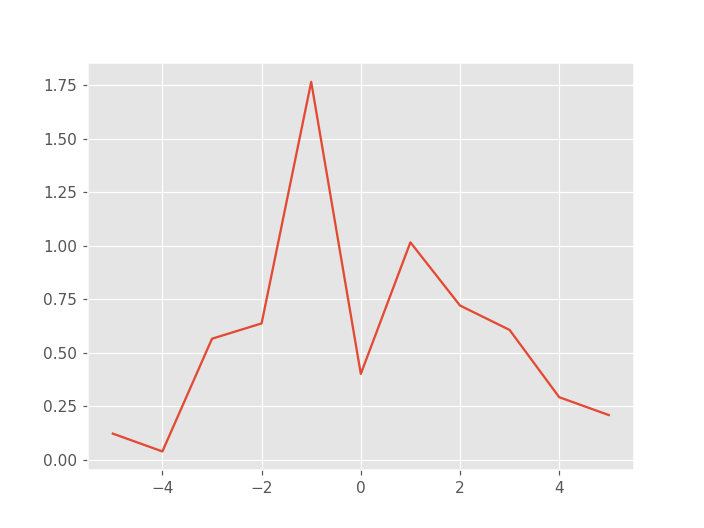

In [352]:
plt.plot(np.linspace(-5, 5, 11), np.array(IMP_DEAD))

<IPython.core.display.Javascript object>


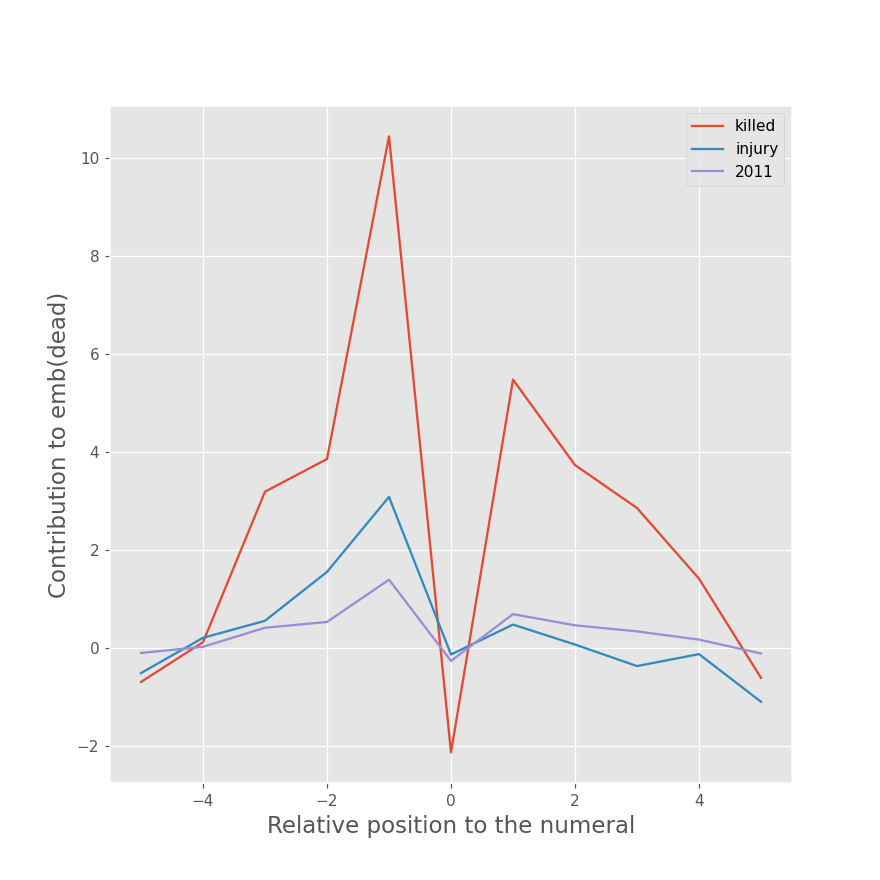

In [361]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Relative position to the numeral', fontsize = 15)
ax.set_ylabel('Contribution to emb(dead)', fontsize = 15)

ax.plot(np.linspace(-5, 5, 11), death, label='killed')
ax.plot(np.linspace(-5, 5, 11), injured, label='injury')
ax.plot(np.linspace(-5, 5, 11), year, label='2011')#/np.linalg.norm(injured))
ax.legend()
plt.savefig("../figures/contribution")



In [ ]:
killed th

<IPython.core.display.Javascript object>


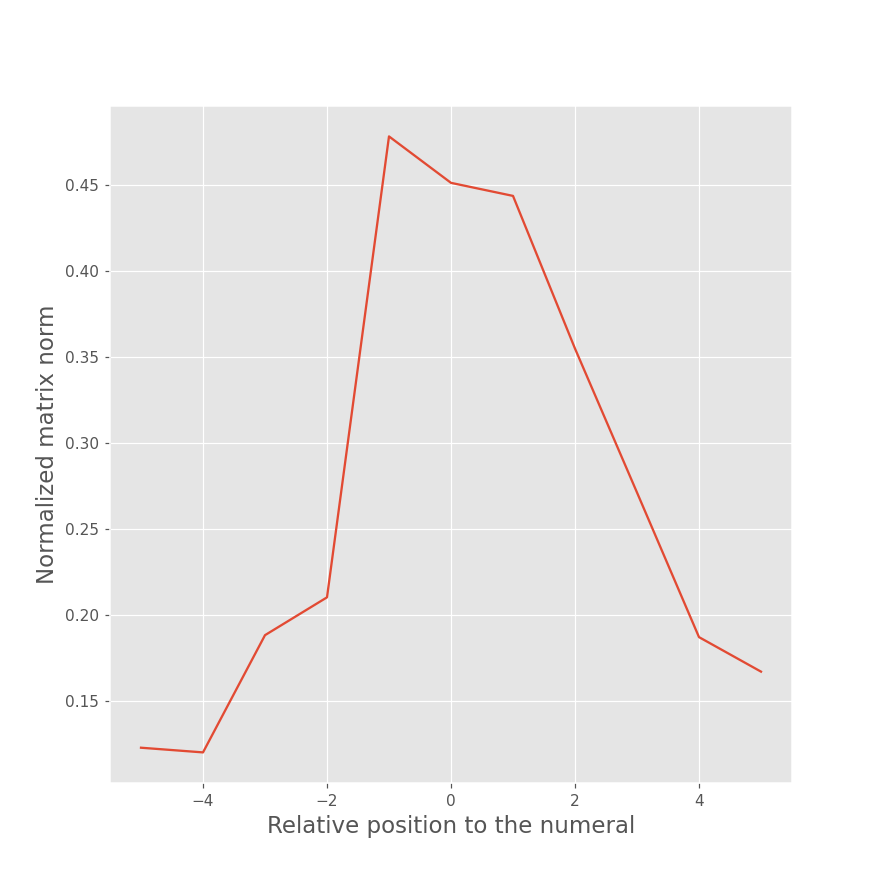

In [362]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 

ax.set_xlabel('Relative position to the numeral', fontsize = 15)
ax.set_ylabel('Normalized matrix norm', fontsize = 15)

ax.plot(np.linspace(-5, 5, 11), normes/np.linalg.norm(normes))
plt.show()
plt.savefig("../figures/matrix_norm")

<IPython.core.display.Javascript object>


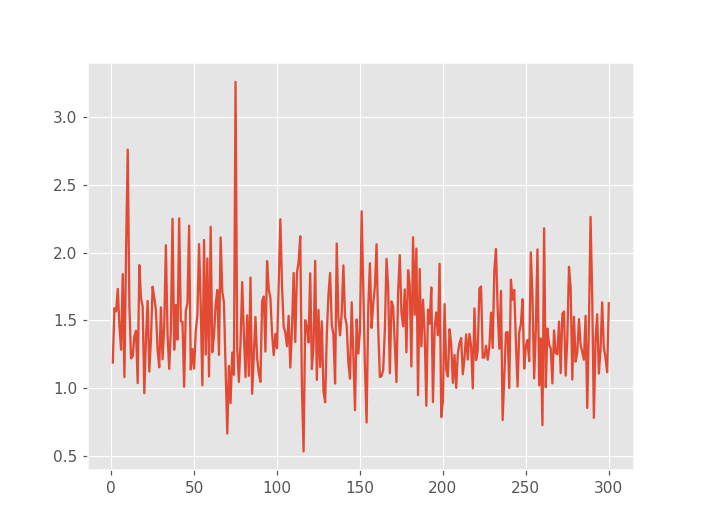

In [401]:
plt.plot(np.linspace(1, 300, 300), normes_elem)

In [386]:
np.linspace(1, 11, 11)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [22]:
death=["killed", "died", "dead", "death", "decease", "assassinated", "dies", "kill", "deceased", "victims"]
vec_1=np.zeros((1, 300))
contador=0
for el in death:
    vec_1=vec_1+model[el]
    contador+=1
vec_1=vec_1/contador #/contador

In [24]:
injury=["injury", "injured", "wound", "wounded", "hurt", "damaged"]
vec_2=np.zeros((1, 300))
contador=0
for el in injury:
    vec_2=vec_2+model[el]
    contador+=1
vec_2=vec_2/contador #/contador

In [30]:
vec=np.concatenate((vec_1, vec_2), axis=0)

In [32]:
np.save("vec", vec)

In [141]:
import gensim
model_2 = KeyedVectors.load_word2vec_format("/Users/guillemramirezsantos/Documents/thesis/plot_numbers.txt")

In [142]:
model_2['two']

array([-9.19590e-01,  3.88500e-02, -1.63530e-01, -4.32820e-01,
       -5.49980e-01,  1.95220e-01, -5.86440e-01,  5.60400e-02,
       -2.08450e-01, -3.69780e-01,  1.48910e-01,  5.91410e-01,
        2.07060e-01, -5.31960e-01,  1.53810e-01, -1.98200e-01,
       -7.22100e-02, -6.78800e-02, -4.01400e-02, -3.15410e-01,
       -7.88600e-02,  8.90600e-02,  1.49900e-02,  4.19660e-01,
        3.62810e-01, -4.77720e-01, -9.31300e-02,  3.64650e-01,
        4.97130e-01, -6.47100e-02,  2.22640e-01, -6.71700e-02,
        1.81290e-01,  6.38190e-01, -2.11600e-02, -1.61600e-01,
        3.57000e-03,  3.09000e-03,  2.89970e-01,  4.57040e-01,
       -4.22360e-01,  8.09830e-01, -2.97240e-01,  2.54600e-02,
        1.47570e-01, -2.69800e-01,  1.83920e-01,  4.45090e-01,
       -3.55220e-01,  3.01970e-01, -4.24510e-01, -7.45000e-02,
        2.32130e-01, -1.85200e-01, -3.37120e-01,  9.65800e-02,
        9.56530e-01, -3.40170e-01,  1.16860e-01, -1.01020e-01,
       -3.41060e-01, -5.46100e-02,  1.44160e-01,  2.181

In [85]:
model = Word2Vec.load_word2vec_format("random_plot_GLOVE.txt", binary=False)

NameError: name 'Word2Vec' is not defined

In [150]:
src_path='/Users/guillemramirezsantos/Documents/thesis/plot_same.txt'#, 'glove.6B.50d.txt', 'glove.6B.200d.txt'
nembed=300
nrows_init=50000 #nrows=nrows_init
tt=time.time()
csv.field_size_limit(sys.maxsize)
df_src = pd.read_csv(src_path, sep=' ', nrows=nrows_init, engine='python', header=None, quoting=csv.QUOTE_NONE, encoding = 'utf-8', error_bad_lines=False)
print(time.time()-tt)

0.18109393119812012


In [161]:
df_src.iloc[:50]

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,300
0,11,-0.66334,-0.14315,-0.18948,0.21363,-0.95041,0.32338,-0.33124,-0.69569,0.69563,...,0.26071,0.09738,-0.02797,0.23456,0.34037,-0.18176,0.49670,-0.32250,-0.49549,0.30243
1,"200,000",-0.03832,0.06724,0.01883,0.08606,0.03229,0.04244,0.09129,0.00981,-0.01394,...,-0.06620,-0.00068,0.05186,0.07451,0.12871,0.01454,0.03767,0.00255,0.08765,-0.00841
2,15,-0.70556,-0.18964,-0.45565,-0.12816,-0.80619,0.29337,-0.30848,-0.56296,0.36085,...,0.71545,0.36989,0.11418,0.46679,0.61856,-0.47908,0.51265,-0.31788,-0.36629,0.30568
3,15,-0.39690,-0.10273,-0.25393,-0.06370,-0.45006,0.16855,-0.16326,-0.30438,0.20483,...,0.39575,0.18116,0.05669,0.23646,0.35042,-0.24251,0.26741,-0.20482,-0.20875,0.16066
4,"3,100",-0.32185,0.53254,0.38655,0.58598,-0.25830,-0.09472,0.21840,0.09545,0.11027,...,0.28997,-0.32458,0.32782,-0.30359,-0.12360,-0.76396,0.03198,0.35730,0.10321,-0.16251
5,three,-0.78867,-0.00795,-0.47775,-0.19563,-0.69206,0.46719,-0.33860,0.07994,0.11900,...,-0.01114,0.25272,0.13165,0.22589,0.78823,0.65402,-0.10272,-0.06544,-0.08803,0.10032
6,58,-0.39644,-0.81543,-0.44780,-0.05398,-0.63875,0.02849,-0.30708,-0.03475,0.30845,...,0.16377,-0.02679,0.38391,0.06278,0.03879,-0.62066,-0.13238,-0.20807,0.48094,-0.36791
7,10,-0.67928,0.06919,-0.47966,-0.28242,-1.02140,0.39679,-0.36055,-0.75451,0.41030,...,0.25321,0.61154,-0.06016,0.30420,0.30628,-0.24827,0.30482,-0.53685,-0.75247,0.18818
8,10,-0.56247,0.06028,-0.39593,-0.22846,-0.83715,0.32671,-0.29439,-0.61550,0.34160,...,0.20825,0.49445,-0.05330,0.24370,0.25551,-0.19890,0.24536,-0.45101,-0.61648,0.15199
9,10,-0.67928,0.06919,-0.47966,-0.28242,-1.02140,0.39679,-0.36055,-0.75451,0.41030,...,0.25321,0.61154,-0.06016,0.30420,0.30628,-0.24827,0.30482,-0.53685,-0.75247,0.18818


In [162]:
df_src[100:150]

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,300
100,52,-0.31673,-0.79087,-0.79167,-0.59329,-0.53112,-0.28959,0.01258,-0.31289,-0.04136,...,0.67362,0.17316,0.03742,0.58628,0.50909,-0.68688,-0.03893,-0.05687,0.16719,-0.60860
101,52,-0.24040,-0.57724,-0.56919,-0.43155,-0.39433,-0.20624,0.00537,-0.22715,-0.03681,...,0.48613,0.11030,0.02907,0.42422,0.37426,-0.49528,-0.03587,-0.04889,0.11622,-0.44445
102,50,-0.66805,-0.52102,-0.57476,-0.47715,-0.31939,0.39792,-0.60009,-0.49861,-0.35284,...,-0.14842,0.33178,0.04612,0.49173,0.75655,-0.74334,0.48473,-0.18067,0.31875,0.12363
103,50,-0.49820,-0.37495,-0.41607,-0.34501,-0.23419,0.29244,-0.43328,-0.35455,-0.25900,...,-0.10911,0.22636,0.03381,0.35223,0.55530,-0.53840,0.34269,-0.13485,0.22892,0.08329
104,18,-0.29157,-0.15629,-0.05254,0.01571,-1.10936,0.26055,-0.69005,-0.59910,0.49411,...,0.54453,-0.11883,0.30491,0.47670,0.39527,-0.31133,0.49763,-0.46635,-0.25448,0.09262
105,8,-0.78848,0.02819,-0.32563,-0.04488,-0.74964,0.16307,-0.44547,-0.39182,0.33382,...,0.22191,0.13061,0.26190,-0.11464,0.52739,0.38329,0.44715,-0.06502,-0.44499,-0.03127
106,5,-0.70498,-0.02540,-0.50795,-0.03028,-0.68434,0.11916,-0.48775,-0.45800,-0.08071,...,0.19040,0.32044,0.09972,0.13991,0.43413,0.62099,0.05873,-0.16121,-0.30624,-0.03014
107,5,-0.77261,-0.02865,-0.55647,-0.03509,-0.74967,0.12912,-0.53659,-0.50699,-0.09027,...,0.20977,0.35472,0.11480,0.15625,0.47462,0.67679,0.06751,-0.17216,-0.34113,-0.03419
108,5,-0.56971,-0.01889,-0.41091,-0.02065,-0.55367,0.09923,-0.39007,-0.36002,-0.06158,...,0.15165,0.25186,0.06954,0.10723,0.35314,0.50941,0.04117,-0.13930,-0.23646,-0.02202
109,39,-0.04035,-0.11446,-0.05479,0.23721,-0.18419,0.18819,-0.65203,0.21961,0.65582,...,0.01665,0.02197,0.23531,0.06313,0.50378,-0.74169,0.28788,0.11124,-0.15937,-0.05597


In [103]:
df_src=df_src.iloc[1:]
df_src[0]

DDDD300    -0.06713   0.10289  -0.00482   0.01385  -0.01531  -0.04021   0.07951   0.07257  -0.02597  -0.14990  -0.01256   0.03159   0.01326   0.10047   0.01204  -0.01719  -0.03962   0.04261  -0.04277  -0.03039  -0.01097  -0.02695   0.02478   0.00776   0.05771   0.05191   0.03065   0.09527   0.01966  -0.00375   0.01763  -0.00105  -0.08796  -0.07629  -0.02463  -0.17492   0.04027   0.02288   0.04823  -0.08345  -0.02783  -0.04805  -0.02130   0.06498  -0.02506  -0.04106  -0.00264  -0.00682   0.01175   0.05274   0.02223  -0.01834  -0.03638   0.01141  -0.02231   0.04021   0.06196   0.03923   0.02815  -0.01600  -0.03043   0.02128   0.02165  -0.10181   0.12233   0.00473  -0.02125  -0.00509   0.01766  -0.00364   0.06971   0.00802   0.07143  -0.02977  -0.02670  -0.05311  -0.02173  -0.03331   0.09931  -0.01592  -0.01838  -0.01347  -0.06789   0.02927  -0.00962   0.05429   0.04009  -0.03911   0.02715   0.03471   0.07825   0.01123  -0.06213   0.03019   0.15664   0.03384  -0.06788  -0.02151  -0.06899 

In [109]:
df_src.iloc[3]

0   -0.04214
1   -0.03359
Name: (DDDD90, -0.3822, -0.31238, -0.28975, 0.009009999999999999, -0.61965, 0.37356999999999996, -0.05669, 0.06762, 0.01549, 0.36125, 0.05629, 0.32911999999999997, 0.24224, 0.11115, -0.09155, 0.0747, 0.31422, 0.09598, -0.16534000000000001, 0.07745, -0.17642, -0.08188, -0.33066999999999996, -0.20886, -0.10260999999999999, 0.25411999999999996, -0.21924000000000002, 0.06141, 0.40298, 0.10274000000000001, -0.09652999999999999, -0.13968, -0.29386, 0.12320999999999999, 0.34188, -0.29118, -0.59611, 0.09295, 0.10363, 0.41397, 0.13298, 0.50198, -0.0034799999999999996, -0.43101999999999996, 0.29328000000000004, -0.45196000000000003, -0.11498, 0.12045, -0.14098, -0.10653, -0.38599, -0.13179000000000002, 0.20367000000000002, -0.02543, 0.017159999999999998, -0.06746, 0.05855, 0.34952, -0.23573000000000002, 0.13410999999999998, -0.46408999999999995, 0.027460000000000002, 0.11005999999999999, -0.11864000000000001, -0.047869999999999996, 0.37277, -0.02225, 0.36455, -0.10255, 

In [34]:
df_src.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,300
0,DDDDnine,-0.33428,0.17117,-0.27086,0.21847,-0.05753,-0.11396,-0.00847,0.07291,0.10304,...,0.16471,-0.38184,-0.32164,-0.30371,0.10149,0.59351,-0.18331,-0.82888,-0.52343,-0.29798
2,DDDD11,-0.29022,-0.01076,0.00567,0.23318,-0.27075,0.34600,-0.20796,0.18367,0.38291,...,0.52305,-0.44714,-0.35440,-0.36152,0.25036,0.55641,-0.15213,-0.90065,-0.09385,-0.01216
3,"DDDD200,000",-0.22993,0.40341,0.11298,0.51633,0.19376,0.25462,0.54773,0.05885,-0.08365,...,-0.39721,-0.00408,0.31117,0.44706,0.77229,0.08727,0.22604,0.01529,0.52587,-0.05049
4,DDDD15,-0.31809,0.01868,-0.14243,0.16387,-0.27243,0.22523,0.13207,0.07103,0.21129,...,0.14528,-0.54384,-0.14757,-0.47933,0.34392,0.49644,-0.32251,-0.82977,-0.23629,-0.16034
6,"DDDD3,100",-0.32185,0.53254,0.38655,0.58598,-0.25830,-0.09472,0.21840,0.09545,0.11027,...,0.28997,-0.32458,0.32782,-0.30359,-0.12360,-0.76396,0.03198,0.35730,0.10321,-0.16251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49126,"DDDD225,000",-0.29959,0.11234,-0.13415,0.39815,-0.30050,0.50961,0.23342,-0.27818,-0.14103,...,-0.35454,0.14204,0.90353,0.64360,0.47248,-0.30041,0.40987,0.03137,0.29632,-0.15661
49134,DDDD345,-0.50705,0.07103,0.04950,0.62892,-0.18044,-0.15915,-0.12696,0.10181,-0.46420,...,-0.07617,-0.42007,0.13341,0.21904,0.40496,-0.27722,-0.59884,-0.20359,0.13216,-0.22806
49520,"DDDD4,150",-0.01365,-0.11698,-0.11202,0.35494,-0.17666,-0.30345,0.10923,0.28350,0.21783,...,-0.37017,0.26739,0.79253,-0.64821,0.28954,-0.42027,-0.34758,0.20032,0.67213,-0.32016
49552,DDDD428,-0.32619,0.25517,0.28934,0.45248,-0.15658,0.09325,-0.18963,-0.22703,-0.19332,...,-0.50207,-0.43962,0.03561,0.31024,0.01878,-0.42475,-0.01248,-0.26399,0.05781,0.13386


In [35]:
df_src

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,300
0,DDDDnine,-0.33428,0.17117,-0.27086,0.21847,-0.05753,-0.11396,-0.00847,0.07291,0.10304,...,0.16471,-0.38184,-0.32164,-0.30371,0.10149,0.59351,-0.18331,-0.82888,-0.52343,-0.29798
1,DDDDnine,-0.33428,0.17117,-0.27086,0.21847,-0.05753,-0.11396,-0.00847,0.07291,0.10304,...,0.16471,-0.38184,-0.32164,-0.30371,0.10149,0.59351,-0.18331,-0.82888,-0.52343,-0.29798
2,DDDD11,-0.29022,-0.01076,0.00567,0.23318,-0.27075,0.34600,-0.20796,0.18367,0.38291,...,0.52305,-0.44714,-0.35440,-0.36152,0.25036,0.55641,-0.15213,-0.90065,-0.09385,-0.01216
3,"DDDD200,000",-0.22993,0.40341,0.11298,0.51633,0.19376,0.25462,0.54773,0.05885,-0.08365,...,-0.39721,-0.00408,0.31117,0.44706,0.77229,0.08727,0.22604,0.01529,0.52587,-0.05049
4,DDDD15,-0.31809,0.01868,-0.14243,0.16387,-0.27243,0.22523,0.13207,0.07103,0.21129,...,0.14528,-0.54384,-0.14757,-0.47933,0.34392,0.49644,-0.32251,-0.82977,-0.23629,-0.16034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49985,DDDD37,-0.32590,0.01696,0.14680,0.03010,-0.18698,0.05829,0.06665,0.26213,-0.28280,...,-0.17831,-0.57691,-0.03653,-0.23378,0.40398,0.14862,-0.31873,-0.41462,-0.36218,0.12563
49986,DDDDtwo,-0.30004,0.53852,-0.44662,-0.13114,-0.00768,0.25344,-0.35464,-0.12650,0.12999,...,-0.24428,-0.39804,-0.24628,-0.36120,0.01387,0.72292,0.06309,-0.60668,-0.28880,0.02555
49987,DDDD21,-0.10881,0.01822,-0.02414,0.04258,-0.32565,0.29203,0.07168,-0.20640,0.06835,...,0.12661,-0.49685,-0.12580,-0.42981,0.26373,0.79548,-0.15147,-0.80550,-0.30157,-0.11696
49988,DDDD13,-0.18946,0.03476,-0.03062,0.23931,-0.29625,0.21263,0.00190,0.14836,0.16411,...,0.10947,-0.55382,-0.15254,-0.30288,0.30157,0.71646,-0.08012,-1.02450,-0.09742,-0.06074


In [3]:
tt=time.time()
glove_file = datapath('/Users/guillemramirezsantos/Documents/thesis/embeddings/glove.6B.300d.txt')
word2vec_glove_file = get_tmpfile("glove.6B.300d.word2vec.txt")
glove2word2vec(glove_file, word2vec_glove_file)
print(time.time()-tt)

/Users/guillemramirezsantos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  after removing the cwd from sys.path.


256.95212173461914


In [5]:
tt=time.time()
model = KeyedVectors.load_word2vec_format(word2vec_glove_file)
print(time.time()-tt)

154.95401787757874


NameError: name 'model' is not defined

In [37]:
el=np.load('../el.npy', allow_pickle=True)
numalt=np.load('../numalt.npy', allow_pickle=True)
nume=np.load('../nume.npy', allow_pickle=True)
ki=np.load('../ki.npy', allow_pickle=True)

In [38]:
el

array([list(['although', 'news', 'reports', 'have', 'recorded', 'numnumnum', 'people', 'killed', 'around', 'the', 'country']),
       list(['although', 'news', 'reports', 'have', 'recorded', 'numnumnum', 'people', 'killed', 'around', 'the', 'country']),
       list(['earlier', 'this', 'week', 'had', 'killed', 'numnumnum', 'people', 'the', 'official', 'irna', 'news']),
       ...,
       list(['of', 'kismayo', 'injures', 'at', 'least', 'numnumnum']),
       list(['following', 'the', 'deadly', 'shooting', 'of', 'numnumnum', 'israeli']),
       list(['the', 'lives', 'of', 'more', 'than', 'numnumnum'])],
      dtype=object)

In [ ]:
MORE_1=pd.read_csv('../MORE_1', sep=',')

In [ ]:
el=[]
nume=[]
for idx in tqdm(range(len(MORE_1))):
    aux=MORE_1.iloc[idx]
    dead_pos=str(aux['Dead_pos'])
    if dead_pos!='nan':
        if dead_pos[0]=='S':
            sent=aux['Snippet']
        if dead_pos[0]=='D':
            sent=aux['Description']
        if dead_pos[0]=='T':
            sent=aux['Title']
        auxaux=dead_pos[1:].split()
        #print(auxaux)
        if int(auxaux[0])!=-1:
            span=[int(auxaux[0]), int(auxaux[1])]
            #num=sent[int(auxaux[0]):int(auxaux[0])+int(auxaux[1])]
            number=sent[span[0]:span[0]+span[1]]
            sent=sent[:span[0]]+" numnumnum "+sent[span[0]+span[1]:]
            sent=sent.replace('U.S.A.', 'usausausa')
            sent=sent.replace('U.S.', 'usususus')
            sent=sent.lower()
            sent=re.sub(r'\W+', ' ', sent)
            sent=re.sub(r'\.', ' ', sent)
            sent=sent.replace('usausausa', 'u.s.a.')
            sent=sent.replace('usususus', 'u.s.')
            sent=sent.split()
            IDX=sent.index('numnumnum')
            new_span=[max(IDX-5, 0), min(IDX+6, len(sent)-1)]
            print(new_span)
            sent=sent[new_span[0]:new_span[1]]
            el.append(sent)
            nume.append(number)

In [40]:
ved=['although', 'news', 'reports', 'have', 'recorded', 'numnumnum', 'people', 'killed', 'around', 'the', 'country']
for word in ved:
    if word!='numnumnum':
        print(model[word])

[-1.0673e-01  3.6786e-01 -5.8375e-02 -1.0303e-01  1.7925e-01 -6.1432e-02
  1.2977e-01  3.0315e-01 -8.3585e-02 -1.7297e+00  1.2016e-01  9.3433e-02
 -3.4105e-02  2.9610e-01  3.6511e-01 -2.0328e-01 -1.4657e-01 -1.9010e-03
 -6.5179e-02 -2.6341e-01  9.5034e-02  1.6621e-01  1.6784e-01  9.9933e-02
 -3.4239e-01  1.8412e-02 -4.6712e-02 -3.2193e-01 -1.2679e-01  2.3599e-01
  3.9599e-01  4.3170e-01 -4.2503e-02 -1.7895e-02 -6.7124e-01 -2.3821e-01
  1.2337e-01  2.3472e-02  8.6293e-02  2.0379e-02 -8.0978e-02 -8.6145e-02
 -2.9415e-02  1.0498e-01  1.4264e-01  2.8117e-02 -6.3039e-02 -5.2442e-02
 -6.6452e-02  2.7885e-01 -2.2373e-02 -4.5306e-02  1.9111e-01  1.8213e-01
  3.2378e-02  1.6525e-01 -1.3449e-01 -3.9397e-02  2.9295e-01  1.9644e-01
  6.6377e-02  2.0434e-01  2.5417e-01  1.5131e-01 -1.1222e-02 -4.3805e-01
  3.2835e-01  3.9068e-02  3.8105e-02  8.8651e-02  2.8567e-02 -4.1883e-02
  6.0675e-02  2.0696e-01  3.9982e-03  7.4708e-02  2.2510e-01  2.4434e-01
 -3.6990e-01  3.2165e-01 -6.7634e-02  5.7121e-02 -1

In [46]:
nume[0]
model['9.0']

array([-0.71767  , -0.18827  , -0.31846  , -0.0050835, -0.93788  ,
        0.46126  , -0.33759  , -0.60844  ,  0.36873  ,  0.40287  ,
       -0.32534  ,  0.77878  ,  0.42451  , -0.45474  ,  0.30701  ,
        0.38449  ,  0.19639  ,  0.35438  , -0.15986  , -0.64703  ,
        0.28823  ,  0.34388  , -0.39552  ,  0.64299  ,  0.06075  ,
        0.62873  , -0.091894 , -0.19731  ,  0.40228  , -0.15498  ,
       -0.21528  ,  0.34535  ,  0.28512  , -0.074433 , -0.002535 ,
       -1.0302   , -0.024514 ,  0.36564  ,  0.72359  , -0.17689  ,
       -0.0070605,  1.3086   ,  0.17822  , -0.92322  , -0.063569 ,
        0.20224  ,  0.33421  ,  0.094043 , -0.3139   , -0.22706  ,
        0.45969  ,  0.53045  ,  0.49897  , -0.70735  , -0.021862 ,
       -0.13924  ,  0.93803  ,  0.32604  , -0.63703  ,  0.02415  ,
       -0.65173  , -0.25579  , -0.12332  , -0.17362  ,  0.1595   ,
       -0.28964  ,  0.002652 ,  0.42871  , -0.48507  ,  0.023853 ,
        0.0032095,  0.84887  , -0.73142  , -0.73122  ,  0.0940

In [65]:
contador=0
words_pivot=[]
for idx in tqdm(range(len(el[:10]))):
    if idx>0 and el[idx]!=el[idx-1]:
        aux=el[idx]
        aux_bool=False
        try: 
            embed=model[nume[idx]]
            aux_bool=True
            unknown=0
        except: 
            aux_bool=False
            unknown=1
        try:
            if aux_bool:   
                embed=embed+model[numalt[idx]]
            else:
                embed=model[numalt[idx]]
                aux_bool=True
        except: 
            unknown+=1
        if aux_bool:
            for element in aux:

                if element!='numnumnum':
                    try:
                        embed=embed+model[element]
                    except:
                        unknown+=1
                        print('malament')
            word=ki[idx]+ki[idx]+ki[idx]+ki[idx]+nume[idx]
            embed=embed/(12-unknown)
            print(word)
            #f.write(u"%s %s\n" % (word, " ".join('%.5f' % x for x in embed)))
            contador+=1
        words_pivot.append(12-unknown) 

100%|██████████| 10/10 [00:00<00:00, 4240.95it/s]

DDDD11
DDDD200,000
DDDD15
DDDD15
DDDD3,100
DDDDthree
DDDD58


250

300

In [60]:
print(words_pivot)

[11, 11]


In [54]:
words_pivot

[1, 1]

In [7]:
contador=0
words_pivot=[]
f = open("new_embedds.txt", "a")
for idx in tqdm(range(len(el))):
    aux=el[idx]
    aux_bool=False
    try: 
        embed=model[nume[idx]]
        aux_bool=True
    except: 
        aux_bool=False
    try:
        if aux_bool:   
            embed+=model[numalt[idx]]
        else:
            embed=model[numalt[idx]]
            aux_bool=True
    except: 
        a=2+2
        words_pivot.append(0)
    if aux_bool:
        unknown=0
        for element in aux:
            if element!='numnumnum':
                try:
                    embed+=model[element]
                except:
                    unknown+=1
        words_pivot.append(10-unknown) 
        word=ki[idx]+ki[idx]+ki[idx]+ki[idx]+nume[idx]
        f.write(u"%s %s\n" % (word, " ".join('%.5f' % x for x in embed)))
        contador+=1
print(contador)

100%|██████████| 251006/251006 [01:14<00:00, 3379.77it/s]

249840


In [8]:
np.save('words_pivot', words_pivot)

In [80]:
regex = r'DDDD'
DDDD=df_src[df_src[0].str.contains(regex, case=False, na=False)]
regex = r'IIII'
IIII=df_src[df_src[0].str.contains(regex, case=False, na=False)]

In [81]:
IIII

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,300
12,IIII60,-0.76122,0.04615,-0.04606,-0.06078,-0.21192,0.07377,0.35548,0.44249,-0.21534,...,-0.20773,-0.56607,0.29202,-0.38497,-0.00859,0.15087,-0.43947,-0.20295,-0.14730,-0.39128
22,IIIIfour,-0.39186,0.53741,-0.39279,0.02598,0.04522,0.28188,-0.16363,0.11055,-0.09811,...,-0.15363,-0.31521,-0.29831,-0.42930,0.20894,0.70456,-0.07975,-0.55917,-0.42223,-0.18301
23,IIIIfour,-0.39186,0.53741,-0.39279,0.02598,0.04522,0.28188,-0.16363,0.11055,-0.09811,...,-0.15363,-0.31521,-0.29831,-0.42930,0.20894,0.70456,-0.07975,-0.55917,-0.42223,-0.18301
26,IIIIthree,-0.37763,0.50981,-0.44110,0.00753,0.07650,0.20361,-0.25832,-0.07116,-0.02101,...,-0.07068,-0.34136,-0.26144,-0.41338,0.22865,0.64731,0.00497,-0.60567,-0.44908,-0.14731
27,IIII19,-0.18098,-0.00224,0.02971,0.01142,-0.21545,0.44314,0.03360,-0.21369,0.19234,...,0.23409,-0.47565,-0.08652,-0.51818,0.40539,0.80156,-0.21303,-0.89602,-0.22979,-0.05031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49945,IIII10,-0.44189,0.24248,-0.22997,0.17226,-0.09634,0.13652,0.03994,0.12076,0.38968,...,0.07098,-0.38924,-0.26919,-0.34262,0.32496,0.27924,-0.26648,-0.77638,-0.05448,-0.13019
49946,IIII10,-0.44189,0.24248,-0.22997,0.17226,-0.09634,0.13652,0.03994,0.12076,0.38968,...,0.07098,-0.38924,-0.26919,-0.34262,0.32496,0.27924,-0.26648,-0.77638,-0.05448,-0.13019
49947,IIII10,-0.44189,0.24248,-0.22997,0.17226,-0.09634,0.13652,0.03994,0.12076,0.38968,...,0.07098,-0.38924,-0.26919,-0.34262,0.32496,0.27924,-0.26648,-0.77638,-0.05448,-0.13019
49975,IIIITwo,-1.07350,-0.00723,-0.15157,-0.50627,-0.65921,0.20892,-0.66826,0.07990,-0.26314,...,0.09454,-0.05296,-0.11567,0.30828,0.60468,0.92156,-0.03959,0.02595,-0.49633,0.17219


In [ ]:
sent

In [ ]:
print(el[190])
print(nume[190])

In [ ]:
MORE_1[MORE_1['Snippet']=='MADRID, Spain (AP) - Spain unveiled a towering monument on Sunday to those killed three years ago in the ...']['Description']

In [ ]:
len(nume)

In [ ]:
import re
span=[10, 4]
number=sent[span[0]:span[0]+span[1]]
sent=sent[:span[0]]+"numnumnum"+sent[span[0]+span[1]:]
sent=sent.replace('U.S.A.', 'usausausa')
sent=sent.replace('U.S.', 'usususus')
sent=sent.lower()
sent=re.sub(r'\W+', ' ', sent)
sent=re.sub(r'\.', ' ', sent)
sent=sent.replace('usausausa', 'u.s.a.')
sent=sent.replace('usususus', 'u.s.')
sent=sent.split()
IDX=sent.index('numnumnum')
new_span=[max(IDX-5, 0), min(IDX+6, len(sent)-1)]
sent[new_span[0]:new_span[0]+new_span[1]]

In [ ]:
#sent='Pakistan officially stated that nearly 300 people were killed in the disaster, while over 2'
#sent=sent.lower()
#sent=
first=True
for el in sent.split():
    print(el)
    try: 
        np.array(model[el])
        if first: 
            aux=np.array(model[el])
            first=False
        else:
            aux += np.array(model[el.lower()])
    except:
        print('vaia')
        

In [ ]:
import re
sent='...try to halt violence in the region that has killed some 200,000 people.'
sent=sent.lower()
sent=re.sub(r'\W+ ', ' ', sent)
sent

In [ ]:
model['10000']

In [ ]:
model.most_similar('obama')

In [ ]:
model.most_similar('banana')

In [ ]:
result = model.most_similar(positive=['woman', 'king'], negative=['man'])
print("{}: {:.4f}".format(*result[0]))

In [148]:
def display_pca_scatterplot(model, words=None, sample=0, prop=[150, 350]):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.vocab.keys()), sample)
        else:
            words = [ word for word in model.vocab ]
        
    word_vectors = np.array([model[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=(6,6))
    plt.scatter(twodim[:prop[0],0], twodim[:prop[0],1], edgecolors='k', c='r')
    plt.scatter(twodim[prop[0]:prop[1],0], twodim[prop[0]:prop[1],1], edgecolors='k', c='b')
    plt.scatter(twodim[prop[1]:,0], twodim[prop[1]:,1], edgecolors='k', c='g')
    contador=0
    for word, (x,y) in zip(words, twodim):
        contador+=1
        if contador%100==0:
            plt.text(x+0.05, y+0.05, word)

<IPython.core.display.Javascript object>


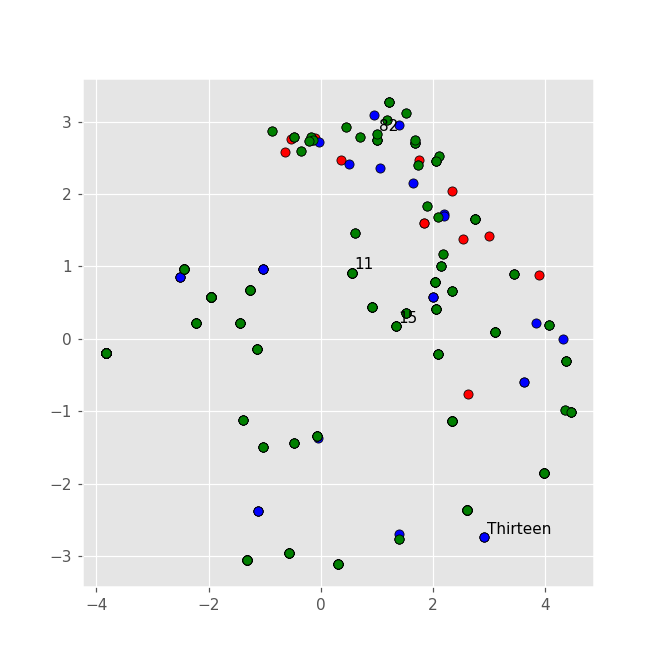

In [149]:
display_pca_scatterplot(model_2, np.array(df_src[0]).tolist(), prop=[166, 332])
#np.array(df_src[0][:500]).tolist()

In [147]:
500/3

166.66666666666666

In [119]:
166*2

332

In [16]:
np.array(df_src[0]).tolist()

['the',
 ',',
 '.',
 'of',
 'to',
 'and',
 'in',
 'a',
 '"',
 "'s",
 'for',
 '-',
 'that',
 'on',
 'is',
 'was',
 'said',
 'with',
 'he',
 'as',
 'it',
 'by',
 'at',
 '(',
 ')',
 'from',
 'his',
 "''",
 '``',
 'an',
 'be',
 'has',
 'are',
 'have',
 'but',
 'were',
 'not',
 'this',
 'who',
 'they',
 'had',
 'i',
 'which',
 'will',
 'their',
 ':',
 'or',
 'its',
 'one',
 'after',
 'new',
 'been',
 'also',
 'we',
 'would',
 'two',
 'more',
 "'",
 'first',
 'about',
 'up',
 'when',
 'year',
 'there',
 'all',
 '--',
 'out',
 'she',
 'other',
 'people',
 "n't",
 'her',
 'percent',
 'than',
 'over',
 'into',
 'last',
 'some',
 'government',
 'time',
 '$',
 'you',
 'years',
 'if',
 'no',
 'world',
 'can',
 'three',
 'do',
 ';',
 'president',
 'only',
 'state',
 'million',
 'could',
 'us',
 'most',
 '_',
 'against',
 'u.s.',
 'so',
 'them',
 'what',
 'him',
 'united',
 'during',
 'before',
 'may',
 'since',
 'many',
 'while',
 'where',
 'states',
 'because',
 'now',
 'city',
 'made',
 'like',
 

#### Fasttext

300 d. 999995 words

In [ ]:
src_path='wiki-news-300d-1M.vec'
nembed=300
nrows_init=10 # nrows=nrows_init, 
tt=time.time()
csv.field_size_limit(sys.maxsize)
df_src = pd.read_csv(src_path, sep=' ',skiprows=[0], engine='python', header=None, quoting=csv.QUOTE_NONE, encoding = 'utf-8')
print(time.time()-tt)

#### Word2Vec 

300 d. 3000000 words. 

In [ ]:
src_path='GoogleNews-vectors-negative300.txt'
nembed=300
nrows_init=10 #nrows=nrows_init, 
tt=time.time()
csv.field_size_limit(sys.maxsize)
df_src = pd.read_csv(src_path, sep=' ', skiprows=[0], engine='python', header=None, quoting=csv.QUOTE_NONE, encoding = 'utf-8')
print(time.time()-tt)

In [9]:
tt=time.time()
glove_file = datapath('/Users/guillemramirezsantos/Documents/thesis/embeddings/wiki-news-300d-1M.vec')
word2vec_glove_file = get_tmpfile("wiki-news-300d-1M.vec")
glove2word2vec(glove_file, word2vec_glove_file)
print(time.time()-tt)

/Users/guillemramirezsantos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  after removing the cwd from sys.path.


ValueError: cannot copy sequence with size 300 to array axis with dimension 1

In [ ]:
df_src

### Data exploration 

In [ ]:
df_src

### Modifying the embeddings 

In [ ]:
src_path='glove.6B.300d.txt'#, 'glove.6B.50d.txt', 'glove.6B.200d.txt'
nembed=300
nrows_init=100000 #nrows=nrows_init
tt=time.time()
csv.field_size_limit(sys.maxsize)
df_src = pd.read_csv(src_path, sep=' ', nrows=nrows_init, engine='python', header=None, quoting=csv.QUOTE_NONE, encoding = 'utf-8')
print(time.time()-tt)

In [ ]:
words=df_src[0]

In [ ]:
words

In [ ]:
words=df_src[0]
embeddings=df_src.drop(columns=[0])
embeddings=embeddings.to_numpy()